<a href="https://colab.research.google.com/github/TMhdSofyan/Unsupervised_Learning/blob/main/Rock_Type.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [1]:
!wget https://raw.githubusercontent.com/TMhdSofyan/Unsupervised_Learning/main/well_log_data.csv

--2023-02-26 05:20:54--  https://raw.githubusercontent.com/TMhdSofyan/Unsupervised_Learning/main/well_log_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26733 (26K) [text/plain]
Saving to: ‘well_log_data.csv’

well_log_data.csv   100%[===================>]  26.11K  --.-KB/s    in 0.002s  

2023-02-26 05:20:54 (11.1 MB/s) - ‘well_log_data.csv’ saved [26733/26733]



In [3]:
import numpy as np
import pandas as pd

# Load required packages 
import numpy as np
import pandas as pd

# ML Libraries
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.impute import KNNImputer

# Plotting Libraries 
%matplotlib nbagg
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
colors = dict(mcolors.BASE_COLORS, **mcolors.CSS4_COLORS)
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

# Data Analysis libraries
from pandas_profiling import ProfileReport

In [4]:

well_log = pd.read_csv('well_log_data.csv', header = 0)
well_log.head()

,GammaRay(API),ShaleVolume,Resistivity,Sonic,Vp(m/s),Vs(m/s),Density,NeutronPorosity,DensityPorosity(g/cc),PoissonRatio,Depth(m)
0,73.215,0.7965,0.25,137.81,7256.3675,2799.0030,2.1278,-999.25,0.2818,0.4126,2007
1,69.152,0.7391,0.20,138.06,7243.2276,2804.5841,2.1202,-999.25,0.2893,0.4118,2008
2,65.965,0.6940,0.21,138.06,7243.2276,2817.0360,2.1149,-999.25,0.2946,0.4109,2009
3,68.215,0.7258,0.27,137.31,7282.7908,2839.0723,2.1217,-999.25,0.2889,0.4104,2010
4,70.840,0.7630,0.36,136.31,7336.2189,2870.3577,2.1301,-999.25,0.2819,0.4096,2011


In [9]:
from pandas_profiling import ProfileReport

# Create a Pandas Profiling report
profile = ProfileReport(well_log)

# Show the report in a notebook iframe
profile.to_notebook_iframe()


TypeError: ignored

In [6]:
well_log[well_log['GammaRay(API)'].isnull()]

,GammaRay(API),ShaleVolume,Resistivity,Sonic,Vp(m/s),Vs(m/s),Density,NeutronPorosity,DensityPorosity(g/cc),PoissonRatio,Depth(m)
301,NaN,0.7965,0.25,137.81,7256.3675,2799.0030,2.1278,-999.25,0.2818,0.4126,2308
302,NaN,0.7391,0.20,138.06,7243.2276,2804.5841,2.1202,-999.25,0.2893,0.4118,2309
303,NaN,0.6940,0.21,138.06,7243.2276,2817.0360,2.1149,-999.25,0.2946,0.4109,2310
304,NaN,0.7258,0.27,137.31,7282.7908,2839.0723,2.1217,-999.25,0.2889,0.4104,2311
305,NaN,0.7630,0.36,136.31,7336.2189,2870.3577,2.1301,-999.25,0.2819,0.4096,2312
306,NaN,0.6415,0.52,134.31,7445.4620,2989.7909,2.1242,-999.25,0.2911,0.4039,6313
307,NaN,0.6327,0.70,127.78,7825.9509,3290.0682,2.1513,-999.25,0.2744,0.3927,6314
308,NaN,0.6384,0.79,125.78,7950.3896,3385.7098,2.1609,-999.25,0.2681,0.3892,2315
309,NaN,0.5932,0.72,126.28,7918.9104,3374.7286,2.1533,-999.25,0.2750,0.3890,2316
310,NaN,0.6428,0.61,123.78,8078.8496,3484.8607,2.1706,-999.25,0.2618,0.3857,2317


In [7]:
nan = np.nan
X = np.array(well_log.loc[:, ['GammaRay(API)','ShaleVolume','Resistivity','Sonic']])
imputer = KNNImputer(n_neighbors=2, weights="uniform")
well_log['GammaRay_Imputed'] = imputer.fit_transform(X)[:,0]

In [8]:
well_log.loc[297:312, ['GammaRay(API)','GammaRay_Imputed']]

,GammaRay(API),GammaRay_Imputed
297,61.012,61.0120
298,40.105,40.1050
299,28.286,28.2860
300,38.855,38.8550
301,NaN,70.9960
302,NaN,67.5585
303,NaN,67.5585
304,NaN,67.5275
305,NaN,71.0900
306,NaN,61.9960


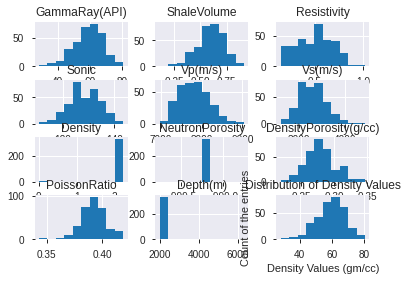

In [11]:
import matplotlib.pyplot as plt

# Plot the histogram
well_log.hist()

# Add a title, x-axis label, y-axis label
plt.title('Distribution of Density Values')
plt.xlabel('Density Values (gm/cc)')
plt.ylabel('Count of the entries')

# Display the plot
plt.show()


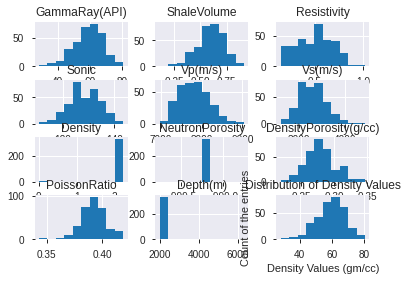

In [12]:
well_log.hist()

plt.title('Distribution of Density Values')
plt.xlabel('Density Values (gm/cc)')
plt.ylabel('Count of the entries')
plt.show()

In [13]:
well_log[well_log.Density ==0]

,GammaRay(API),ShaleVolume,Resistivity,Sonic,Vp(m/s),Vs(m/s),Density,NeutronPorosity,DensityPorosity(g/cc),PoissonRatio,Depth(m),GammaRay_Imputed
321,45.543,0.4036,0.37,132.31,7558.0077,3147.3555,0.0,-999.25,0.3137,0.3951,2328,45.543
322,47.480,0.4310,0.44,127.28,7856.6939,3375.0354,0.0,-999.25,0.2971,0.3869,2329,47.480
323,56.512,0.5594,0.55,119.03,8401.2434,3763.5865,0.0,-999.25,0.2579,0.3745,2330,56.512
324,59.824,0.6065,0.68,116.03,8618.4607,3918.7153,0.0,-999.25,0.2428,0.3697,2331,59.824
325,58.105,0.5820,0.65,118.03,8472.4223,3812.1862,0.0,-999.25,0.2521,0.3731,2332,58.105


In [14]:
well_log.Density.replace(0, method = 'ffill', inplace = True )

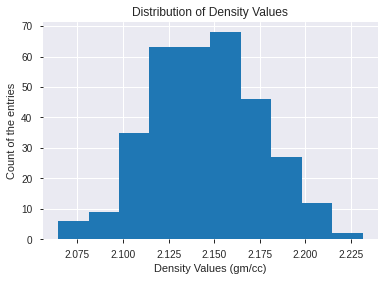

In [15]:
# Plot the Histogram to confirm zero density values 
well_log.Density.hist()
plt.title('Distribution of Density Values')
plt.xlabel('Density Values (gm/cc)')
plt.ylabel('Count of the entries')
plt.show()

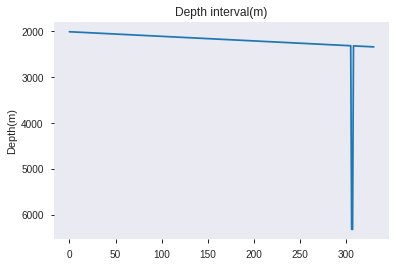

In [16]:
well_log['Depth(m)'].plot()
plt.title('Depth interval(m)')
plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [17]:
well_log.loc[ well_log['Depth(m)']>6000,'Depth(m)' ] = np.nan
transformed_depth = well_log['Depth(m)'].interpolate(method = 'linear')
well_log['Depth(m)_imputed'] = transformed_depth
     

In [18]:
well_log.loc[300:310, ['Depth(m)','Depth(m)_imputed']]

,Depth(m),Depth(m)_imputed
300,2307.0,2307.0
301,2308.0,2308.0
302,2309.0,2309.0
303,2310.0,2310.0
304,2311.0,2311.0
305,2312.0,2312.0
306,NaN,2313.0
307,NaN,2314.0
308,2315.0,2315.0
309,2316.0,2316.0


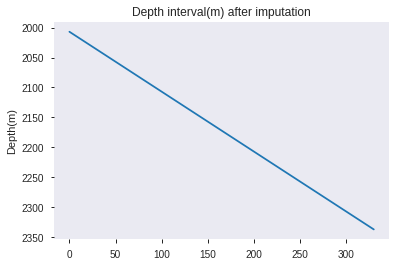

In [19]:
well_log['Depth(m)_imputed'].plot()
plt.title('Depth interval(m) after imputation')
plt.ylabel('Depth(m)')
plt.gca().invert_yaxis()
plt.grid()
plt.show()

In [20]:
well_log.drop(columns = ['GammaRay(API)', 'NeutronPorosity','Depth(m)'], inplace = True)

In [21]:
well_log.head()

,ShaleVolume,Resistivity,Sonic,Vp(m/s),Vs(m/s),Density,DensityPorosity(g/cc),PoissonRatio,GammaRay_Imputed,Depth(m)_imputed
0,0.7965,0.25,137.81,7256.3675,2799.0030,2.1278,0.2818,0.4126,73.215,2007.0
1,0.7391,0.20,138.06,7243.2276,2804.5841,2.1202,0.2893,0.4118,69.152,2008.0
2,0.6940,0.21,138.06,7243.2276,2817.0360,2.1149,0.2946,0.4109,65.965,2009.0
3,0.7258,0.27,137.31,7282.7908,2839.0723,2.1217,0.2889,0.4104,68.215,2010.0
4,0.7630,0.36,136.31,7336.2189,2870.3577,2.1301,0.2819,0.4096,70.840,2011.0


In [22]:
# Preprocessing the dataset 

logs_tmp = well_log.values  
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(logs_tmp)
well_logs_scaled = pd.DataFrame(x_scaled)

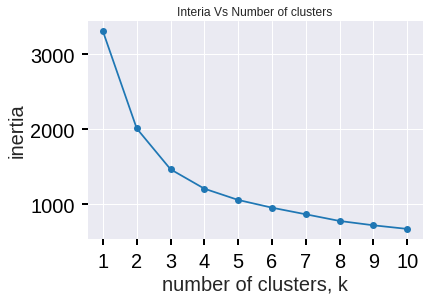

In [23]:
inertias = []
clusters_list = range(1,11)

# Compute Inertia value for different number of cluster
for num_clusters in clusters_list:
    # Create a KMeans instance with k clusters: model
    model=KMeans(n_clusters=num_clusters , random_state=123)
    
    # Fit model to samples
    model.fit(well_logs_scaled)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)

# Plot the Inertia Vs Number of Clusters 
plt.plot(clusters_list, inertias, marker = 'o')

plt.xlabel('number of clusters, k', size=20)
plt.ylabel('inertia', size=20)
plt.xticks(clusters_list)
plt.title('Interia Vs Number of clusters')
plt.tick_params(direction='out', length=6, width=2, colors='k')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.grid( zorder=1)
plt.show()

In [24]:
# k-means implementation with 3 clusters

kmeans = KMeans(n_clusters=3)
kmeans.fit(well_logs_scaled)

labels_rocks = kmeans.predict(well_logs_scaled)
rocktypes = pd.DataFrame({'RockType':labels_rocks})
well_log['rock_types'] = rocktypes.RockType

In [25]:
well_logs_scaled_embedded = TSNE(n_components=2, learning_rate=200,random_state=10, 
                                 perplexity=50).fit_transform(well_logs_scaled)

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


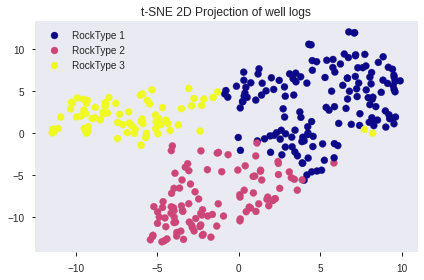

In [26]:
# Projecting the well log features into 2d projection using t-SNE

classes = ['RockType 1','RockType 2','RockType 3']
scatter = plt.scatter(well_logs_scaled_embedded[:,0],
            well_logs_scaled_embedded[:,1], 
            c =  rocktypes['RockType'], cmap = 'plasma' )
plt.title('t-SNE 2D Projection of well logs')
plt.legend(handles=scatter.legend_elements()[0], labels=classes)
plt.grid()
plt.tight_layout()
#plt.show()

In [27]:
# Display the well logs 

def well_log_display(top_depth,bottom_depth, df, list_columns):
    
    logs=df[(df['Depth(m)_imputed'] >= top_depth) & (df['Depth(m)_imputed'] <= bottom_depth)]
    fig, ax = plt.subplots(nrows=1, ncols=len(list_columns), figsize=(15,20),  sharey=True)
    fig.subplots_adjust(top=0.75,wspace=0.1)

    for axes in ax:
        axes.set_ylim (top_depth,bottom_depth)
        axes.yaxis.grid(True)
        axes.get_xaxis().set_visible(False) 
        
    for i in range(len(list_columns)):
        if (list_columns[i] == 'rock_types'):
            ax1=ax[i].twiny()
            label = logs.rock_types
            tagged_depths = logs['Depth(m)_imputed']
            rock_type_depth(ax1,tagged_depths, label)
            ax1.set_xlabel(list_columns[i],color= list(colors.keys())[i], fontsize=15)    
            ax1.minorticks_off()
            ax1.grid(False)
            
        elif (list_columns[i] == 'Resistivity'):
            ax1=ax[i].twiny()
            ax1.set_xlim(0.1,10)
            ax1.set_xscale('log')
            ax1.grid(True)
            ax1.plot(logs[list_columns[i]], logs['Depth(m)_imputed'], label=list_columns[i], color=list(colors.keys())[i]) 
            ax1.spines['top'].set_position(('outward',40))
            ax1.set_xlabel(list_columns[i],color= list(colors.keys())[i], fontsize=10)    
            ax1.tick_params(axis='x', colors=list(colors.keys())[i],labelsize = 10)
        
        else:
            ax1=ax[i].twiny()
            ax1.grid(True)
            ax1.plot(logs[list_columns[i]], logs['Depth(m)_imputed'], label=list_columns[i], color=list(colors.keys())[i]) 
            ax1.spines['top'].set_position(('outward',40))
            ax1.set_xlabel(list_columns[i],color= list(colors.keys())[i], fontsize=10)    
            ax1.tick_params(axis='x', colors=list(colors.keys())[i],labelsize = 10)

In [28]:
def rock_type_depth (ax, depth, label):
    patches = []
    for i in range(len(well_log)):
        poly=Rectangle((0,depth[i]), 4, 1)
        patches.append(poly)

    p = PatchCollection(patches, match_original=False,alpha=0.6)

    colors = 1000*np.array(well_log.rock_types)
    p.set_array(np.array(colors))
    ax.add_collection(p)
    ax.invert_yaxis()
    x_pos_label=['', '','','']
    ax.set_xticklabels(x_pos_label, rotation = 0)
    ax.get_xaxis().set_visible(True)

<ipython-input-28-6d375b5c62fe>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_pos_label, rotation = 0)


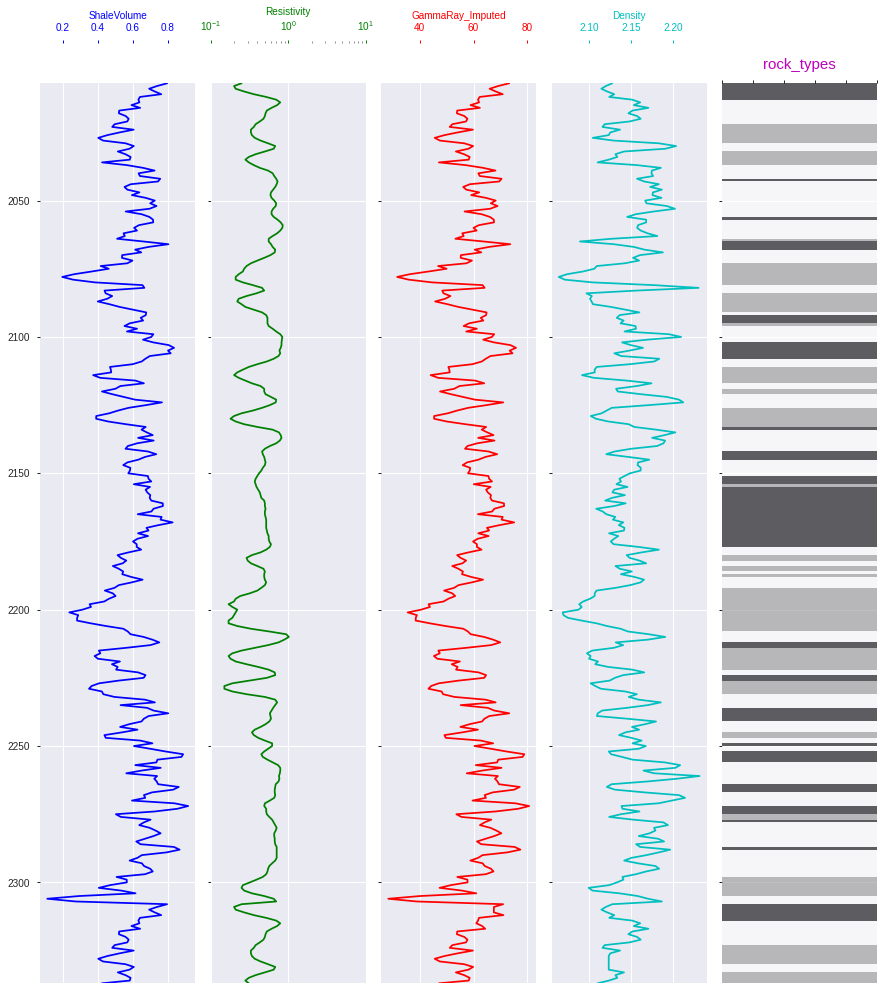

In [29]:
# Display the combined plot for 'ShaleVolume', 'Resistivity', 'GammaRay_Imputed','Density', 'rock_types'

list_columns = ['ShaleVolume', 'Resistivity', 'GammaRay_Imputed','Density', 'rock_types']
well_log_display(well_log['Depth(m)_imputed'].min(),well_log['Depth(m)_imputed'].max(), well_log, list_columns)